# 📱 iPhone Mobile Contract Analysis

### Author: Aston Crawley

The purpose of this analysis is to determine the most cost effective way to purchase an iPhone 17 Pro given the current mobile phone contracts currently available on the market.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Assume that contract starts on September 30th 2025
contract_start = "30-09-2025"

In [ ]:
# Option 1 - Larger upfront cost with smaller monthly payments
# contract_len = 24
# upfront_cost = 429.00
# per_month_1 = 29.99
# per_month_2 = 31.49
# per_month_3 = 32.99

# Option 2 - Smaller upfront cost with larger monthly payments
# contract_len = 24
# upfront_cost = 99.00
# per_month_1 = 44.99
# per_month_2 = 46.49
# per_month_3 = 47.99


In [13]:
def get_monthly_costs(contract_len, upfront_cost, per_month_1, per_month_2, per_month_3):
    monthly_costs = []

    for i in range(contract_len):
        cost = 0
        if i == 0:
            cost += upfront_cost
        if i < 6:
            cost += per_month_1
        elif i > 5 and i < 18:
            cost += per_month_2
        elif i > 17:
            cost += per_month_3
        else:
            print("Something's gone wrong")
        
        monthly_costs.append(cost)

    return monthly_costs

In [14]:
option_1_mon_cost = get_monthly_costs(contract_len = 24, 
                                      upfront_cost = 429.00,
                                      per_month_1 = 29.99,
                                      per_month_2 = 31.49,
                                      per_month_3 = 32.99)

In [15]:
option_2_mon_cost = get_monthly_costs(contract_len = 24, 
                                      upfront_cost = 99.00,
                                      per_month_1 = 44.99,
                                      per_month_2 = 46.49,
                                      per_month_3 = 47.99)

In [16]:
option_1_cum_cost = np.cumsum(option_1_mon_cost)
option_1_cum_cost

array([ 458.99,  488.98,  518.97,  548.96,  578.95,  608.94,  640.43,
        671.92,  703.41,  734.9 ,  766.39,  797.88,  829.37,  860.86,
        892.35,  923.84,  955.33,  986.82, 1019.81, 1052.8 , 1085.79,
       1118.78, 1151.77, 1184.76])

In [17]:
# Check monthly average cost value to confirm calculations
np.mean(option_1_mon_cost)

np.float64(49.36500000000001)

In [18]:
option_2_cum_cost = np.cumsum(option_2_mon_cost)
option_2_cum_cost

array([ 143.99,  188.98,  233.97,  278.96,  323.95,  368.94,  415.43,
        461.92,  508.41,  554.9 ,  601.39,  647.88,  694.37,  740.86,
        787.35,  833.84,  880.33,  926.82,  974.81, 1022.8 , 1070.79,
       1118.78, 1166.77, 1214.76])

In [19]:
# Check monthly average cost value to confirm calculations
np.mean(option_2_mon_cost)

np.float64(50.61500000000001)

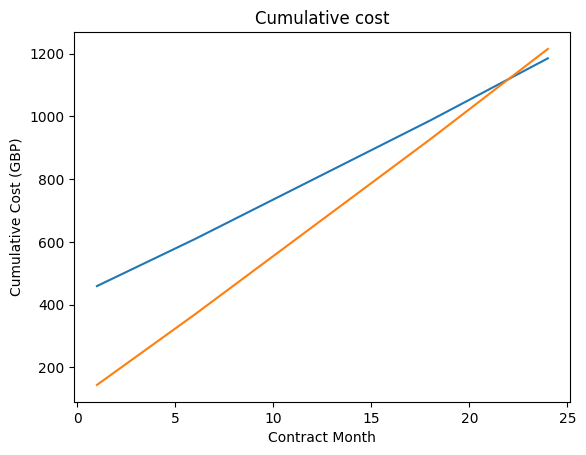

In [21]:
plt.plot(range(1, 25, 1), option_1_cum_cost, label="Option 1")
plt.plot(range(1, 25, 1), option_2_cum_cost, label="Option 2")
plt.title("Cumulative cost")
plt.xlabel("Contract Month")
plt.ylabel("Cumulative Cost (GBP)")
plt.show()

In [ ]:
option_dif = option_1_cum_cost - option_2_cum_cost
option_dif

array([315., 300., 285., 270., 255., 240., 225., 210., 195., 180., 165.,
       150., 135., 120., 105.,  90.,  75.,  60.,  45.,  30.,  15.,   0.,
       -15., -30.])

It seems then that the most cost effective option would be to selection option 1 and pay £30 less at the end of the 24 month contract, assuming that you end your contract on the final day and do not continue to pay the contract price out of contract. But what about the difference in upfront cost? If you were to put that money into a savings account, what interest rate would be required in order for the total cost for both options to be the same?

In [ ]:
# Compound interest calculation
# A = P(1 + r/n)^nt 

n = 365 # annual interest payments (Daily)
t = 2 # timeframe (2 years)
A = 345 # final amount
P = 315 # principal amount

r = n * ((A/P) ** (1/(365*2)) - 1)
r # minimum interest rate required to break even

0.04548872342077126

In [31]:
test = P * (1 + r/n) ** (n*t)
test

345.0000000000175

In order for you to break even with option 1 having chosen option 2 you would have to put the initial difference into a high yield savings account earning 4.5488% interest paid daily which would earn £30 worth of interest across the 24 month contract period.